### Цели и задачи проекта

<font color='#777778'>Цель проекта: провести исследовательский анализ рынка заведений общественного питания Москвы.
Задачи: Исследовать количество объектов общественного питания по каждой категории;
Исследовать распределение количества заведений по административным районам Москвы;
Изучить соотношение сетевых и несетевых заведений в целом по всем данным и в разрезе категорий заведения;
Исследовать количество посадочных мест в заведениях;
Исследовать рейтинг заведений;
Изучить, с какими данными показывают самую сильную корреляцию рейтинги заведений;
Сгруппировать данные по названиям заведений и найти топ-15 популярных сетей в Москве;
Изучить вариацию среднего чека заведения в зависимости от района Москвы.</font>

### Описание данных

<font color='#777778'>Файл /datasets/rest_info.csv содержит информацию о заведениях общественного питания:
name — название заведения;
address — адрес заведения;
district — административный район, в котором находится заведение, например Центральный административный округ;
category — категория заведения, например «кафе», «пиццерия» или «кофейня»;
hours — информация о днях и часах работы;
rating — рейтинг заведения по оценкам пользователей в Яндекс Картах (высшая оценка — 5.0);
chain — число, выраженное 0 или 1, которое показывает, является ли заведение сетевым (для маленьких сетей могут встречаться ошибки):
0 — заведение не является сетевым;
1 — заведение является сетевым.
seats — количество посадочных мест.
Файл /datasets/rest_price.csv содержит информацию о среднем чеке в заведениях общественного питания:
price — категория цен в заведении, например «средние», «ниже среднего», «выше среднего» и так далее;
avg_bill — строка, которая хранит среднюю стоимость заказа в виде диапазона, например:
«Средний счёт: 1000–1500 ₽»;
«Цена чашки капучино: 130–220 ₽»;
«Цена бокала пива: 400–600 ₽».
и так далее;
middle_avg_bill — число с оценкой среднего чека, которое указано только для значений из столбца avg_bill, начинающихся с подстроки «Средний счёт»:
Если в строке указан ценовой диапазон из двух значений, в столбец войдёт медиана этих двух значений.
Если в строке указано одно число — цена без диапазона, то в столбец войдёт это число.
Если значения нет или оно не начинается с подстроки «Средний счёт», то в столбец ничего не войдёт.
middle_coffee_cup — число с оценкой одной чашки капучино, которое указано только для значений из столбца avg_bill, начинающихся с подстроки «Цена одной чашки капучино»:
Если в строке указан ценовой диапазон из двух значений, в столбец войдёт медиана этих двух значений.
Если в строке указано одно число — цена без диапазона, то в столбец войдёт это число.
Если значения нет или оно не начинается с подстроки «Цена одной чашки капучино», то в столбец ничего не войдёт.</font>

## 1. Загрузка данных и знакомство с ними

- Загрузите данные о заведениях общественного питания Москвы. Путь к файлам: `/datasets/rest_info.csv` и `/datasets/rest_price.csv`.

- Познакомьтесь с данными и изучите общую информацию о них.

In [4]:
# Импортируем библиотеки
import pandas as pd
import numpy as np

# Загружаем библиотеки для визуализации данных
import matplotlib.pyplot as plt
import seaborn as sns

# Загружаем библиотеку для расчёта коэффициента корреляции phi_k
!pip install phik
from phik import phik_matrix


In [5]:
# Выгружаем данные в переменные rest_info и rest_price
rest_info = pd.read_csv('///')
rest_price = pd.read_csv('///')

In [6]:
# Выводим первые строки датафрейма на экран
rest_info.head()

,id,name,category,address,district,hours,rating,chain,seats
0,0c3e3439a8c64ea5bf6ecd6ca6ae19f0,WoWфли,кафе,"Москва, улица Дыбенко, 7/1",Северный административный округ,"ежедневно, 10:00–22:00",5.0,0,NaN
1,045780ada3474c57a2112e505d74b633,Четыре комнаты,ресторан,"Москва, улица Дыбенко, 36, корп. 1",Северный административный округ,"ежедневно, 10:00–22:00",4.5,0,4.0
2,1070b6b59144425896c65889347fcff6,Хазри,кафе,"Москва, Клязьминская улица, 15",Северный административный округ,"пн-чт 11:00–02:00; пт,сб 11:00–05:00; вс 11:00...",4.6,0,45.0
3,03ac7cd772104f65b58b349dc59f03ee,Dormouse Coffee Shop,кофейня,"Москва, улица Маршала Федоренко, 12",Северный административный округ,"ежедневно, 09:00–22:00",5.0,0,NaN
4,a163aada139c4c7f87b0b1c0b466a50f,Иль Марко,пиццерия,"Москва, Правобережная улица, 1Б",Северный административный округ,"ежедневно, 10:00–22:00",5.0,1,148.0


In [7]:
# Выводим информацию о датафрейме
rest_info.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8406 entries, 0 to 8405
Data columns (total 9 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   id        8406 non-null   object 
 1   name      8406 non-null   object 
 2   category  8406 non-null   object 
 3   address   8406 non-null   object 
 4   district  8406 non-null   object 
 5   hours     7870 non-null   object 
 6   rating    8406 non-null   float64
 7   chain     8406 non-null   int64  
 8   seats     4795 non-null   float64
dtypes: float64(2), int64(1), object(6)
memory usage: 591.2+ KB


In [8]:
# Выводим первые строки датафрейма на экран
rest_price.head()

,id,price,avg_bill,middle_avg_bill,middle_coffee_cup
0,045780ada3474c57a2112e505d74b633,выше среднего,Средний счёт:1500–1600 ₽,1550.0,NaN
1,1070b6b59144425896c65889347fcff6,средние,Средний счёт:от 1000 ₽,1000.0,NaN
2,03ac7cd772104f65b58b349dc59f03ee,NaN,Цена чашки капучино:155–185 ₽,NaN,170.0
3,a163aada139c4c7f87b0b1c0b466a50f,средние,Средний счёт:400–600 ₽,500.0,NaN
4,8a343546b24e4a499ad96eb7d0797a8a,средние,NaN,NaN,NaN


In [9]:
# Выводим информацию о датафрейме
rest_price.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4058 entries, 0 to 4057
Data columns (total 5 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 4058 non-null   object 
 1   price              3315 non-null   object 
 2   avg_bill           3816 non-null   object 
 3   middle_avg_bill    3149 non-null   float64
 4   middle_coffee_cup  535 non-null    float64
dtypes: float64(2), object(3)
memory usage: 158.6+ KB


Анализ первичных данных из датасета 'rest_info':
1) Содержатся пропуски в столбцах 'hours' и 'seats';
2) Возможны неявные дубликаты в стобце 'name';
3) Некорректный тип данных для столбца 'seats'.

Анализ первичных данных из датасета 'rest_price':
1) Есть пропуски во всех столбцах, кроме 'id'.
2) Датасет примерно в два раза меньше 'rest_info', скорее всего, это означает, что для болшой части заведений не предоставлено информации о ценах.

### Подготовка единого датафрейма



In [10]:
df = rest_info.merge(rest_price, on='id', how='left', )

In [11]:
df.head() 

,id,name,category,address,district,hours,rating,chain,seats,price,avg_bill,middle_avg_bill,middle_coffee_cup
0,0c3e3439a8c64ea5bf6ecd6ca6ae19f0,WoWфли,кафе,"Москва, улица Дыбенко, 7/1",Северный административный округ,"ежедневно, 10:00–22:00",5.0,0,NaN,NaN,NaN,NaN,NaN
1,045780ada3474c57a2112e505d74b633,Четыре комнаты,ресторан,"Москва, улица Дыбенко, 36, корп. 1",Северный административный округ,"ежедневно, 10:00–22:00",4.5,0,4.0,выше среднего,Средний счёт:1500–1600 ₽,1550.0,NaN
2,1070b6b59144425896c65889347fcff6,Хазри,кафе,"Москва, Клязьминская улица, 15",Северный административный округ,"пн-чт 11:00–02:00; пт,сб 11:00–05:00; вс 11:00...",4.6,0,45.0,средние,Средний счёт:от 1000 ₽,1000.0,NaN
3,03ac7cd772104f65b58b349dc59f03ee,Dormouse Coffee Shop,кофейня,"Москва, улица Маршала Федоренко, 12",Северный административный округ,"ежедневно, 09:00–22:00",5.0,0,NaN,NaN,Цена чашки капучино:155–185 ₽,NaN,170.0
4,a163aada139c4c7f87b0b1c0b466a50f,Иль Марко,пиццерия,"Москва, Правобережная улица, 1Б",Северный административный округ,"ежедневно, 10:00–22:00",5.0,1,148.0,средние,Средний счёт:400–600 ₽,500.0,NaN


In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8406 entries, 0 to 8405
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 8406 non-null   object 
 1   name               8406 non-null   object 
 2   category           8406 non-null   object 
 3   address            8406 non-null   object 
 4   district           8406 non-null   object 
 5   hours              7870 non-null   object 
 6   rating             8406 non-null   float64
 7   chain              8406 non-null   int64  
 8   seats              4795 non-null   float64
 9   price              3315 non-null   object 
 10  avg_bill           3816 non-null   object 
 11  middle_avg_bill    3149 non-null   float64
 12  middle_coffee_cup  535 non-null    float64
dtypes: float64(4), int64(1), object(8)
memory usage: 919.4+ KB


In [13]:

temp = df.copy() 
len(temp)

8406

## 2. Предобработка данных



In [14]:
# Общее количество строк до предобработки
initial_rows = len(df)


In [15]:
#df = df.dropna(subset=['seats'])
df['seats'] = df['seats'].fillna(-1)
df['seats'] = df['seats'].astype('int64')

Уровень незначительности пропусков в столбце 'hours' позволяет просто убрать эти значения, они могут быть связаны с ошибками ввода данных. Пропуски в строке 'seats' могут быть связаны с тем, что не для всех заведений посчитаны места, так что воизбежании искажения данных и имеет смысл заменить на "заглушку" по типу '-1'. Пропуски в столбцах 'price', 'avg_bill', 'middle_avg_bill', 'middle_coffee_cup', в свою очередь, детерминированы спецификой соединения датасетов с разным колличеством данных, а также особенностями подсчета значений - это особенно касается стобцов 'middle_avg_bill' и 'middle_coffee_cup'. Всвязи с этим их не стоит трогать без необходимости.

In [16]:
missing_values_count = df.isna().sum()
print("Количество пропусков в каждом столбце:")
print(missing_values_count)
relative_missing_values = missing_values_count / len(df)
print("Относительное количество пропусков в каждом столбце:")
print(relative_missing_values)

Количество пропусков в каждом столбце:
id                      0
name                    0
category                0
address                 0
district                0
hours                 536
rating                  0
chain                   0
seats                   0
price                5091
avg_bill             4590
middle_avg_bill      5257
middle_coffee_cup    7871
dtype: int64
Относительное количество пропусков в каждом столбце:
id                   0.000000
name                 0.000000
category             0.000000
address              0.000000
district             0.000000
hours                0.063764
rating               0.000000
chain                0.000000
seats                0.000000
price                0.605639
avg_bill             0.546039
middle_avg_bill      0.625387
middle_coffee_cup    0.936355
dtype: float64


In [17]:
# Комментарий ревьюера
def show_missing_stats(tmp0):
    """
    Функция для отображения статистики пропущенных значений в DataFrame.
    """
    missing_stats = pd.DataFrame({
        'Кол-во пропусков': tmp0.isnull().sum(),
        'Доля пропусков': tmp0.isnull().mean()
    })
    missing_stats = missing_stats[missing_stats['Кол-во пропусков'] > 0]
    
    if missing_stats.empty:
        return "Пропусков в данных нет"
    
    # Форматируем при выводе через Styler
    return (missing_stats.style.format({'Доля пропусков': '{:.4f}'}).background_gradient(cmap='coolwarm'))
show_missing_stats(df)

,Кол-во пропусков,Доля пропусков
hours,536,0.0638
price,5091,0.6056
avg_bill,4590,0.5460
middle_avg_bill,5257,0.6254
middle_coffee_cup,7871,0.9364


Пропуски в столбце 'hours', учитывая незначительность их количества, могут быть связаны с ошибками ввода данных. Пропуски в строке 'seats' могут быть связаны с тем, что не для всех заведений посчитаны места, так что воизбежании искажения данных и имеет смысл заменить на "заглушку" по типу '-1'. Пропуски в столбцах 'price', 'avg_bill', 'middle_avg_bill', 'middle_coffee_cup', в свою очередь, детерминированы спецификой соединения датасетов с разным колличеством данных, а также особенностями подсчета значений - это особенно касается стобцов 'middle_avg_bill' и 'middle_coffee_cup'. Всвязи с этим их не стоит трогать без необходимости.

In [18]:
# Преобрахование пропусков
df[['seats', 'hours']] = df[['seats', 'hours']].fillna(-1)

In [19]:
# Комментарий ревьюера
# Проверим сколько удалено строк датасета
a, b = len(temp), len(df)
print(a, b, round((a-b)/a*100, 2))

8406 8406 0.0


В столбцах 'name' и 'category' могут с большой вероятностью встчечаться неявные дубликаты. 

In [20]:
df['name'] = df['name'].str.upper()

In [21]:
df['category'] = df['category'].str.lower()

In [22]:
# Проверка наличия дубликатов
duplicates = df[df.duplicated()]
print("Дубликаты:")
print(duplicates)


# Удаление дубликатов
df = df.drop_duplicates()
print("Данные без дубликатов:")
print(df)

Дубликаты:
Empty DataFrame
Columns: [id, name, category, address, district, hours, rating, chain, seats, price, avg_bill, middle_avg_bill, middle_coffee_cup]
Index: []
Данные без дубликатов:
                                    id                  name  category  \
0     0c3e3439a8c64ea5bf6ecd6ca6ae19f0                WOWФЛИ      кафе   
1     045780ada3474c57a2112e505d74b633        ЧЕТЫРЕ КОМНАТЫ  ресторан   
2     1070b6b59144425896c65889347fcff6                 ХАЗРИ      кафе   
3     03ac7cd772104f65b58b349dc59f03ee  DORMOUSE COFFEE SHOP   кофейня   
4     a163aada139c4c7f87b0b1c0b466a50f             ИЛЬ МАРКО  пиццерия   
...                                ...                   ...       ...   
8401  0342ad1a45ed41ba89dcba246a8267e5            СУШИ МАНИЯ      кафе   
8402  ee6bb7c3650e47bd8186fca08eda1091             МИСЛАВНЕС      кафе   
8403  62e8c64d4c89467aba608e39ef87616b               САМОВАР      кафе   
8404  06a0db5ecd4842d48cd6350aa923e297          ЧАЙХАНА SABR      каф

In [23]:

df

,id,name,category,address,district,hours,rating,chain,seats,price,avg_bill,middle_avg_bill,middle_coffee_cup
0,0c3e3439a8c64ea5bf6ecd6ca6ae19f0,WOWФЛИ,кафе,"Москва, улица Дыбенко, 7/1",Северный административный округ,"ежедневно, 10:00–22:00",5.0,0,-1,NaN,NaN,NaN,NaN
1,045780ada3474c57a2112e505d74b633,ЧЕТЫРЕ КОМНАТЫ,ресторан,"Москва, улица Дыбенко, 36, корп. 1",Северный административный округ,"ежедневно, 10:00–22:00",4.5,0,4,выше среднего,Средний счёт:1500–1600 ₽,1550.0,NaN
2,1070b6b59144425896c65889347fcff6,ХАЗРИ,кафе,"Москва, Клязьминская улица, 15",Северный административный округ,"пн-чт 11:00–02:00; пт,сб 11:00–05:00; вс 11:00...",4.6,0,45,средние,Средний счёт:от 1000 ₽,1000.0,NaN
3,03ac7cd772104f65b58b349dc59f03ee,DORMOUSE COFFEE SHOP,кофейня,"Москва, улица Маршала Федоренко, 12",Северный административный округ,"ежедневно, 09:00–22:00",5.0,0,-1,NaN,Цена чашки капучино:155–185 ₽,NaN,170.0
4,a163aada139c4c7f87b0b1c0b466a50f,ИЛЬ МАРКО,пиццерия,"Москва, Правобережная улица, 1Б",Северный административный округ,"ежедневно, 10:00–22:00",5.0,1,148,средние,Средний счёт:400–600 ₽,500.0,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...
8401,0342ad1a45ed41ba89dcba246a8267e5,СУШИ МАНИЯ,кафе,"Москва, Профсоюзная улица, 56",Юго-Западный административный округ,"ежедневно, 09:00–02:00",4.4,0,86,NaN,NaN,NaN,NaN
8402,ee6bb7c3650e47bd8186fca08eda1091,МИСЛАВНЕС,кафе,"Москва, Пролетарский проспект, 19, корп. 1",Южный административный округ,"ежедневно, 08:00–22:00",4.8,0,150,NaN,NaN,NaN,NaN
8403,62e8c64d4c89467aba608e39ef87616b,САМОВАР,кафе,"Москва, Люблинская улица, 112А, стр. 1",Юго-Восточный административный округ,"ежедневно, круглосуточно",3.9,0,150,NaN,Средний счёт:от 150 ₽,150.0,NaN
8404,06a0db5ecd4842d48cd6350aa923e297,ЧАЙХАНА SABR,кафе,"Москва, Люблинская улица, 112А, стр. 1",Юго-Восточный административный округ,"ежедневно, круглосуточно",4.2,1,150,NaN,NaN,NaN,NaN


Комментарий студента: обработаны неявные дубликаты

In [24]:
df['name']=df['name'].str.upper()
df['address']=df['address'].str.lower()
# Проверяем дубликаты в столбцах name и address
duplicates = df[df.duplicated(subset=['name', 'address'], keep=False)]

# Подсчитываем количество дубликатов
absolute_count = duplicates.shape[0]
relative_count = absolute_count / df.shape[0] * 100

print(f"Количество дубликатов: {absolute_count}")
print(f"Процент дубликатов: {relative_count:.2f}%")
# Удаляем дубликаты, сохраняя первое вхождение каждой уникальной комбинации
df = df.drop_duplicates(subset=['name', 'address'], keep='first')



Количество дубликатов: 8
Процент дубликатов: 0.10%


In [27]:
print(df['hours']) 
#таким образом мы видим, что нам необходимо выделить стобцы, значение в которых равняется 'ежедневно, круглосуточно'

0                                  ежедневно, 10:00–22:00
1                                  ежедневно, 10:00–22:00
2       пн-чт 11:00–02:00; пт,сб 11:00–05:00; вс 11:00...
3                                  ежедневно, 09:00–22:00
4                                  ежедневно, 10:00–22:00
                              ...                        
8401                               ежедневно, 09:00–02:00
8402                               ежедневно, 08:00–22:00
8403                             ежедневно, круглосуточно
8404                             ежедневно, круглосуточно
8405                             ежедневно, круглосуточно
Name: hours, Length: 8402, dtype: object


In [28]:
df['is_24_7'] = df['hours'].apply(lambda x: True if x == 'ежедневно, круглосуточно' else False)


/tmp/ipykernel_755/969009296.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['is_24_7'] = df['hours'].apply(lambda x: True if x == 'ежедневно, круглосуточно' else False)


In [29]:
df.head() #проверяем работу функции

,id,name,category,address,district,hours,rating,chain,seats,price,avg_bill,middle_avg_bill,middle_coffee_cup,is_24_7
0,0c3e3439a8c64ea5bf6ecd6ca6ae19f0,WOWФЛИ,кафе,"москва, улица дыбенко, 7/1",Северный административный округ,"ежедневно, 10:00–22:00",5.0,0,-1,NaN,NaN,NaN,NaN,False
1,045780ada3474c57a2112e505d74b633,ЧЕТЫРЕ КОМНАТЫ,ресторан,"москва, улица дыбенко, 36, корп. 1",Северный административный округ,"ежедневно, 10:00–22:00",4.5,0,4,выше среднего,Средний счёт:1500–1600 ₽,1550.0,NaN,False
2,1070b6b59144425896c65889347fcff6,ХАЗРИ,кафе,"москва, клязьминская улица, 15",Северный административный округ,"пн-чт 11:00–02:00; пт,сб 11:00–05:00; вс 11:00...",4.6,0,45,средние,Средний счёт:от 1000 ₽,1000.0,NaN,False
3,03ac7cd772104f65b58b349dc59f03ee,DORMOUSE COFFEE SHOP,кофейня,"москва, улица маршала федоренко, 12",Северный административный округ,"ежедневно, 09:00–22:00",5.0,0,-1,NaN,Цена чашки капучино:155–185 ₽,NaN,170.0,False
4,a163aada139c4c7f87b0b1c0b466a50f,ИЛЬ МАРКО,пиццерия,"москва, правобережная улица, 1б",Северный административный округ,"ежедневно, 10:00–22:00",5.0,1,148,средние,Средний счёт:400–600 ₽,500.0,NaN,False


In [30]:
# Комментарий ревьюера
df['is_24_7'].value_counts()

False    7672
True      730
Name: is_24_7, dtype: int64

In [31]:
# Комментарий ревьюера
# Проверим сколько удалено строк датасета
a, b = len(temp), len(df)
print(" Было строк в исходном датасете", a,
      '\n', "Осталось строк в датасете после обработки", b,
      '\n', "Удалено строк в датасете после обработки", a-b,
      '\n', "Процент потерь", round((a-b)/a*100, 2))

 Было строк в исходном датасете 8406 
 Осталось строк в датасете после обработки 8402 
 Удалено строк в датасете после обработки 4 
 Процент потерь 0.05


---

### Промежуточный вывод



In [32]:
# Общее количество строк после предобработки
final_rows = len(df)


In [33]:
# Количество удалённых строк
deleted_rows = initial_rows - final_rows
print(f"Количество удалённых строк: {deleted_rows}")
# Добавляем подсчет в относительном виде
relative_deletion_percentage = (deleted_rows / initial_rows) * 100
print(f"Процент удалённых строк: {relative_deletion_percentage:.2f}%")

Количество удалённых строк: 4
Процент удалённых строк: 0.05%


Были объеденены базы данных, обработаны пропуски и дубликаты. Ликвидированы неявные дубликаты в столбцах 'name' и 'address', которые могли быть детерминированы различием написания в разных источниках. Пропуски в столбце 'hours', учитывая незначительность их количества, могут быть связаны с ошибками ввода данных. Пропуски в строке 'seats' могут быть связаны с тем, что не для всех заведений посчитаны места, так что воизбежании искажения данных и имеет смысл заменить на "заглушку" по типу '-1'. Пропуски в столбцах 'price', 'avg_bill', 'middle_avg_bill', 'middle_coffee_cup', в свою очередь, детерминированы спецификой соединения датасетов с разным колличеством данных, а также особенностями подсчета значений - это особенно касается стобцов 'middle_avg_bill' и 'middle_coffee_cup'. Всвязи с этим их не стоит трогать без необходимости.

## 3. Исследовательский анализ данных


---

### Задача 1

Какие категории заведений представлены в данных? Исследуйте количество объектов общественного питания по каждой категории. Результат сопроводите подходящей визуализацией.

In [34]:
# нужно посчитать id и сгруппировать по category 
unique_values = df['category'].unique()
print(unique_values)
count_unique_values = df['category'].nunique()
print(count_unique_values)



['кафе' 'ресторан' 'кофейня' 'пиццерия' 'бар,паб' 'быстрое питание'
 'булочная' 'столовая']
8


In [35]:
count_id_values = df['id'].count()
print(count_id_values)



8402


In [36]:
category_grouped_count = df.groupby('category')['id'].count()
print(category_grouped_count)


category
бар,паб             764
булочная            256
быстрое питание     603
кафе               2376
кофейня            1413
пиццерия            633
ресторан           2042
столовая            315
Name: id, dtype: int64


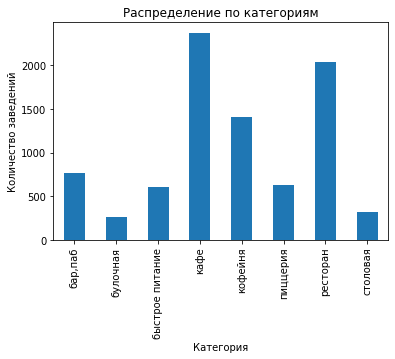

In [37]:
import matplotlib.pyplot as plt


category_grouped_count.plot(kind='bar')
plt.title("Распределение по категориям")
plt.xlabel("Категория")
plt.ylabel("Количество заведений")
plt.show()


В данных представлены следующие категории заведений: 'кафе' 'ресторан' 'кофейня' 'пиццерия' 'бар,паб' 'быстрое питание'
 'булочная' 'столовая'. Больше всего заведений в категориях "кафе" (более 2000), "ресторан" (около 2000) и "кофейня" (чуть менее 1500). Меньше всего заведений в категориях "булочная" и "столовая" (менее 500).

---

### Задача 2

Какие административные районы Москвы присутствуют в данных? Исследуйте распределение количества заведений по административным районам Москвы, а также отдельно распределение заведений каждой категории в Центральном административном округе Москвы. Результат сопроводите подходящими визуализациями.

In [38]:
#примерно то же самое, но с district 
district_grouped_count = df.groupby('district')['id'].count()
print(district_grouped_count)

district
Восточный административный округ            798
Западный административный округ             850
Северный административный округ             898
Северо-Восточный административный округ     890
Северо-Западный административный округ      409
Центральный административный округ         2242
Юго-Восточный административный округ        714
Юго-Западный административный округ         709
Южный административный округ                892
Name: id, dtype: int64


In [39]:
df.head()

,id,name,category,address,district,hours,rating,chain,seats,price,avg_bill,middle_avg_bill,middle_coffee_cup,is_24_7
0,0c3e3439a8c64ea5bf6ecd6ca6ae19f0,WOWФЛИ,кафе,"москва, улица дыбенко, 7/1",Северный административный округ,"ежедневно, 10:00–22:00",5.0,0,-1,NaN,NaN,NaN,NaN,False
1,045780ada3474c57a2112e505d74b633,ЧЕТЫРЕ КОМНАТЫ,ресторан,"москва, улица дыбенко, 36, корп. 1",Северный административный округ,"ежедневно, 10:00–22:00",4.5,0,4,выше среднего,Средний счёт:1500–1600 ₽,1550.0,NaN,False
2,1070b6b59144425896c65889347fcff6,ХАЗРИ,кафе,"москва, клязьминская улица, 15",Северный административный округ,"пн-чт 11:00–02:00; пт,сб 11:00–05:00; вс 11:00...",4.6,0,45,средние,Средний счёт:от 1000 ₽,1000.0,NaN,False
3,03ac7cd772104f65b58b349dc59f03ee,DORMOUSE COFFEE SHOP,кофейня,"москва, улица маршала федоренко, 12",Северный административный округ,"ежедневно, 09:00–22:00",5.0,0,-1,NaN,Цена чашки капучино:155–185 ₽,NaN,170.0,False
4,a163aada139c4c7f87b0b1c0b466a50f,ИЛЬ МАРКО,пиццерия,"москва, правобережная улица, 1б",Северный административный округ,"ежедневно, 10:00–22:00",5.0,1,148,средние,Средний счёт:400–600 ₽,500.0,NaN,False


In [40]:
mid_filtered_df = df[df['district'] == 'Центральный административный округ']
mid_grouped_count = mid_filtered_df.groupby('category')['id'].count()
print(mid_grouped_count)


category
бар,паб            364
булочная            50
быстрое питание     87
кафе               464
кофейня            428
пиццерия           113
ресторан           670
столовая            66
Name: id, dtype: int64


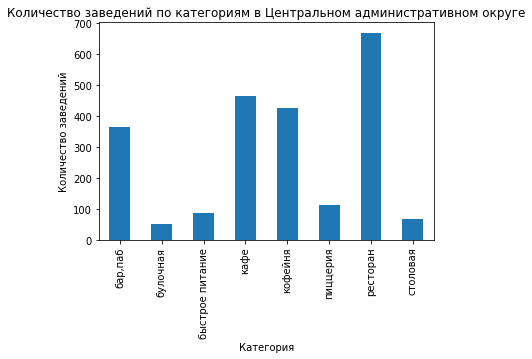

In [41]:
#Количество заведений по категориям в ЦАО в абсолютных значениях
mid_grouped_count.plot(kind='bar')
plt.title("Количество заведений по категориям в Центральном административном округе")
plt.xlabel("Категория")
plt.ylabel("Количество заведений")
plt.show()

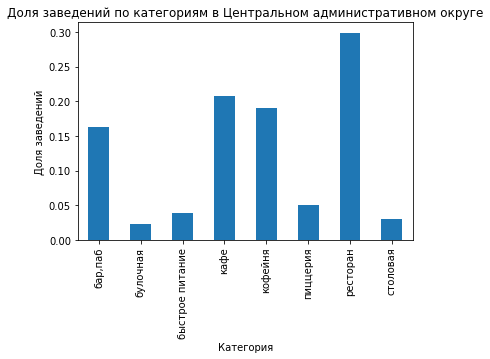

In [42]:
#Количество заведений по категориям в ЦАО в относительных значениях
total_count = mid_grouped_count.sum()
relative_counts = mid_grouped_count / total_count

relative_counts.plot(kind='bar')
plt.title("Доля заведений по категориям в Центральном административном округе")
plt.xlabel("Категория")
plt.ylabel("Доля заведений")
plt.show()

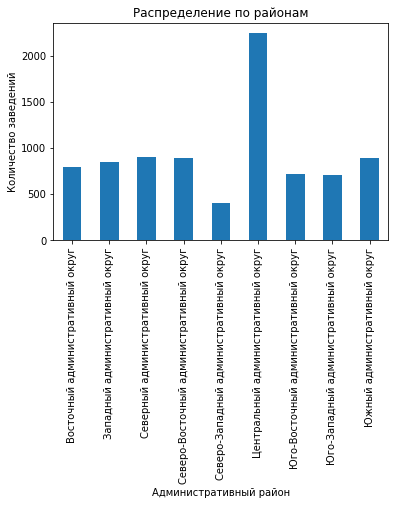

In [43]:
district_grouped_count.plot(kind='bar')
plt.title("Распределение по районам")
plt.xlabel("Административный район")
plt.ylabel("Количество заведений")
plt.show()


В данных представлены следующие административные районы Москвы:'Северный административный округ', 'Северо-Восточный административный округ', 'Северо-Западный административный округ', 'Западный административный округ', 'Центральный административный округ', 'Восточный административный округ' 'Юго-Восточный административный округ', 'Южный административный округ' и 'Юго-Западный административный округ'. Больше всего заведений в центральном административном округе (более 2000 или больше четверти), меньше всего - в северо-западном административном округе (менее 500 или менее 5%).

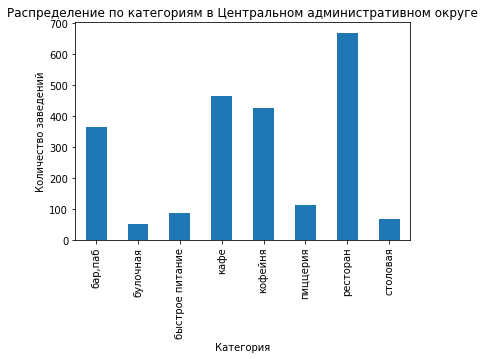

In [44]:
# Фильтруем данные
mid_filtered_df = df[df['district'] == 'Центральный административный округ']

# Группируем данные по категориям и считаем количество заведений
mid_category_grouped_count = mid_filtered_df.groupby('category')['id'].count()

# Строим гистограмму
mid_category_grouped_count.plot(kind='bar')
plt.title("Распределение по категориям в Центральном административном округе")
plt.xlabel("Категория")
plt.ylabel("Количество заведений")
plt.show()


В центральном административном округе больше всего заведений представлено в категории "ресторан" (около 30%), меньше всего - в категориях "булочная", "быстрое питание" и "столовая" (менее 5%).

---

### Задача 3

Изучите соотношение сетевых и несетевых заведений в целом по всем данным и в разрезе категорий заведения. Каких заведений больше — сетевых или несетевых? Какие категории заведений чаще являются сетевыми? Исследуйте данные, ответьте на вопросы и постройте необходимые визуализации.

In [45]:
chain_grouped_count = df.groupby('chain')['id'].count()
print(chain_grouped_count)

chain
0    5199
1    3203
Name: id, dtype: int64


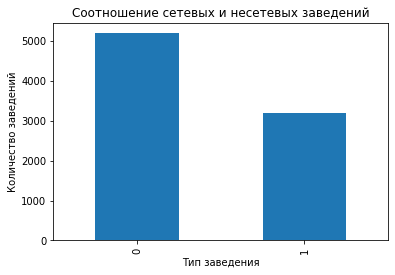

In [46]:
chain_grouped_count.plot(kind='bar')
plt.title("Соотношение сетевых и несетевых заведений")
plt.xlabel("Тип заведения")
plt.ylabel("Количество заведений")
plt.show()

Комментарий студента: добавлено распределение в относительных значениях 

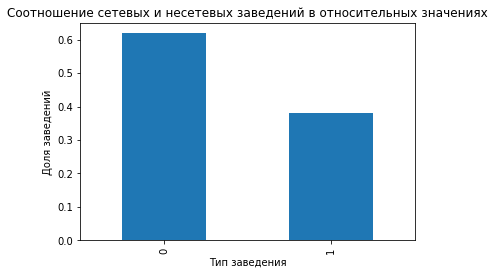

In [47]:
relative_counts = df['chain'].value_counts(normalize=True)
relative_counts.plot(kind='bar')
plt.title("Соотношение сетевых и несетевых заведений в относительных значениях")
plt.xlabel("Тип заведения")
plt.ylabel("Доля заведений")
plt.show()






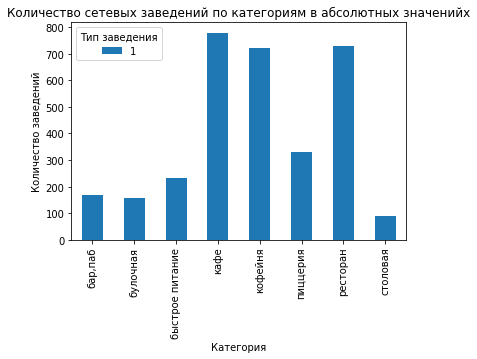

In [48]:
# Группируем данные по категориям и типу заведения
grouped_df = df.groupby(['category', 'chain']).size().reset_index(name='count')

# Фильтруем данные, чтобы оставить только сетевые заведения
filtered_df = grouped_df[grouped_df['chain'] == 1]

# Создаём сводную таблицу
pivot_table = filtered_df.pivot(index='category', columns='chain', values='count')

# Строим гистограмму
pivot_table.plot(kind='bar')
plt.title("Количество сетевых заведений по категориям в абсолютных значенийх")
plt.xlabel("Категория")
plt.ylabel("Количество заведений")
plt.legend(title="Тип заведения")
plt.show()


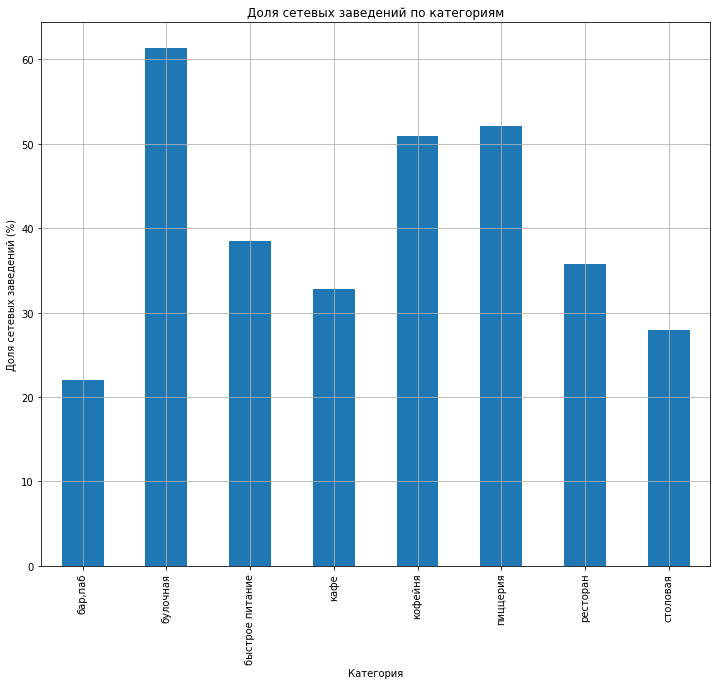

In [50]:
# Группируем данные по категориям и вычисляем долю сетевых заведений
category_chain_ratio = df.groupby('category')['chain'].mean() * 100

# Визуализируем данные в виде гистограммы
category_chain_ratio.plot(kind='bar', figsize=(12, 10))
plt.title("Доля сетевых заведений по категориям")
plt.xlabel("Категория")
plt.ylabel("Доля сетевых заведений (%)")
plt.grid(True)
plt.show()

Несетевых заведений в целом больше примерно на 20%. Чаще всего сетевыми оказываются заведения категории "булочная", "кофейня" и "пиццерия" (более 50%).

---

### Задача 4

Исследуйте количество посадочных мест в заведениях. Встречаются ли в данных аномальные значения или выбросы? Если да, то с чем они могут быть связаны? Приведите для каждой категории заведений наиболее типичное для него количество посадочных мест. Результат сопроводите подходящими визуализациями.


Комментарий студента: справлен график распределения по количеству посадочных мест

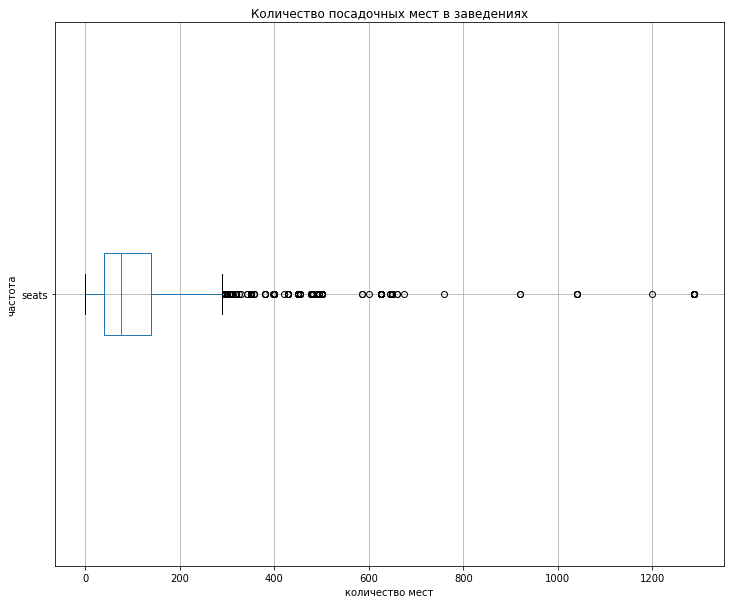

In [51]:
# Фильтруем данные, исключая строки со значением -1 в столбце seats
seats_filtered_df = df[df['seats'] != -1]

# Строим боксплот на основе отфильтрованных данных
seats_filtered_df.boxplot(column='seats', vert=False, grid=True, figsize=(12, 10))

#Добавляем название
plt.title('Количество посадочных мест в заведениях')

# Подписываем оси
plt.xlabel('количество мест')
plt.ylabel('частота')

plt.show()


Комментарий студента: добавлено название 

Аномальные значения могут быть связаны с немногочисленными особенно большимы заведениями или, что более вероятно, крупными фудкортами.

In [52]:
#Фильтруем данные, исключая строки со значениями -1 в столбце seats
seats_filtered_df = df[df['seats'] != -1]
# Группируем данные по категориям и вычисляем медиану количества мест
median_seats = seats_filtered_df.groupby('category')['seats'].median()

# Преобразуем серию в сводную таблицу (DataFrame)
pivot_table = median_seats.to_frame(name='median_seats')

print(pivot_table)


                 median_seats
category                     
бар,паб                  82.0
булочная                 50.0
быстрое питание          65.0
кафе                     60.0
кофейня                  80.0
пиццерия                 55.0
ресторан                 86.0
столовая                 75.5


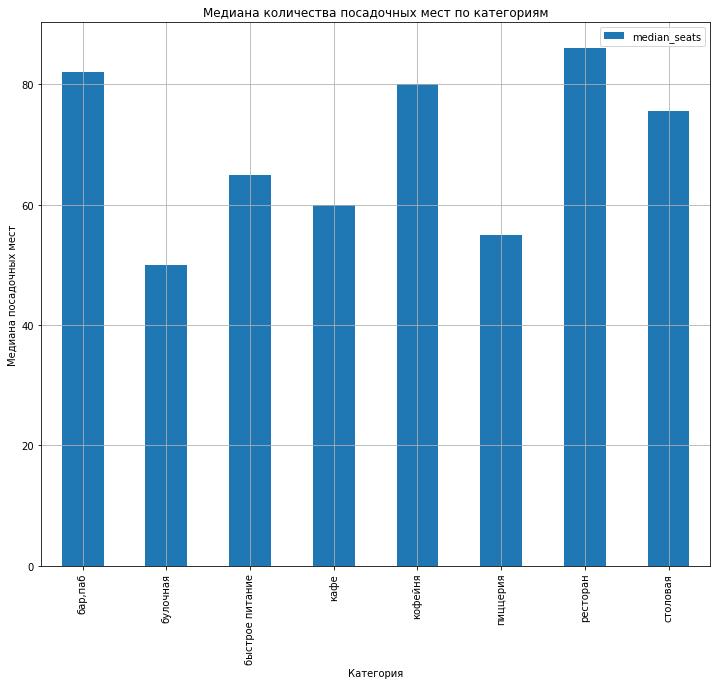

In [53]:
seats_filtered_df = df[df['seats'] != -1]
# Группируем данные по категориям и вычисляем медиану количества мест
median_seats = seats_filtered_df.groupby('category')['seats'].median()

# Преобразуем серию в сводную таблицу (DataFrame)
pivot_table = median_seats.to_frame(name='median_seats')

# Визуализируем данные в виде гистограммы
pivot_table.plot(kind='bar', figsize=(12, 10))
plt.title("Медиана количества посадочных мест по категориям")
plt.xlabel("Категория")
plt.ylabel("Медиана посадочных мест")
plt.grid(True)
plt.show()


В данных, связанных с посадочными местами, встречаются аномальные значения (когда посадочных мест больше 300). Аномальные значения могут быть связаны с немногочисленными особенно большимы заведениями или, что более вероятно, крупными фудкортами. 

В целом количество посадочных мест в заведениях, за редкими исключениями, не превышает 200. В среднем больше всего посадочных мест в кофейнях, барах и ресторанах (80 и больше), меньше - в булочных, пиццериях и кафе (60 и меньше).

---

### Задача 5

Исследуйте рейтинг заведений. Визуализируйте распределение средних рейтингов по категориям заведений. Сильно ли различаются усреднённые рейтинги для разных типов общепита?

In [54]:
#считаем средний рейтинг по категориями
average_rating_by_category = df.groupby('category')['rating'].mean()
print(average_rating_by_category)


category
бар,паб            4.387696
булочная           4.268359
быстрое питание    4.050249
кафе               4.124285
кофейня            4.277282
пиццерия           4.301264
ресторан           4.290402
столовая           4.211429
Name: rating, dtype: float64


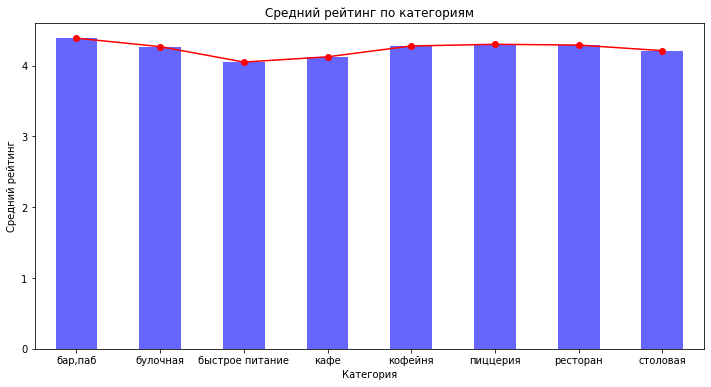

In [55]:
#визуализируем
plt.figure(figsize=(12, 6))  # Устанавливаем ширину и высоту графика
average_rating_by_category.plot(kind='bar', color='blue', alpha=0.6)
average_rating_by_category.plot(kind='line', color='red', marker='o')

plt.title("Средний рейтинг по категориям")
plt.xlabel("Категория")
plt.ylabel("Средний рейтинг")
plt.show()

Снредний рейтинг не сильно разнится в зависимости от категории (не более, чем на 0.34), но в 21-м веке ориентироваться на это сложно из-за феномена инфляции оценок.

---

### Задача 6

Изучите, с какими данными показывают самую сильную корреляцию рейтинги заведений? Постройте и визуализируйте матрицу корреляции рейтинга заведения с разными данными: его категория, положение (административный район Москвы), статус сетевого заведения, количество мест, ценовая категория и признак, является ли заведения круглосуточным. Выберите самую сильную связь и проверьте её.

Комментарий студента: создана копия датасета с заменой заглушек на пропуски.

In [56]:
df_copy = df.replace(-1, np.nan)
correlation_columns = ['rating', 'category', 'district', 'chain', 'seats', 'price', 'is_24_7']
df_corr = df_copy[correlation_columns].copy()
correlation_matrix = df_corr.phik_matrix(interval_cols=['rating', 'seats'])
correlation_matrix

,rating,category,district,chain,seats,price,is_24_7
rating,1.000000,0.189716,0.200761,0.107833,0.000000,0.220295,0.150365
category,0.189716,1.000000,0.174584,0.266000,0.048923,0.566933,0.244815
district,0.200761,0.174584,1.000000,0.064473,0.352440,0.202787,0.076357
chain,0.107833,0.266000,0.064473,1.000000,0.056523,0.218211,0.043488
seats,0.000000,0.048923,0.352440,0.056523,1.000000,0.088146,0.043193
price,0.220295,0.566933,0.202787,0.218211,0.088146,1.000000,0.084183
is_24_7,0.150365,0.244815,0.076357,0.043488,0.043193,0.084183,1.000000


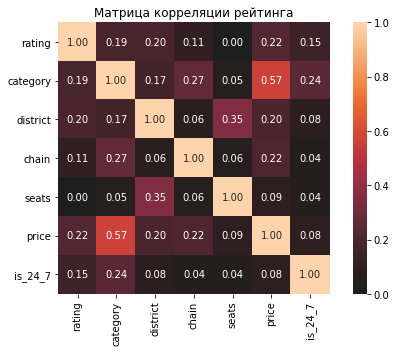

In [57]:
plt.figure(figsize=(7, 5))

sns.heatmap(correlation_matrix,
            annot=True,
            center=0,
            fmt='.2f',
            square=True)

plt.title('Матрица корреляции рейтинга')
plt.tight_layout()
plt.show()

Наибольшую корреляцию показатель рейтинга имеет с ценой.

In [58]:
price_rating = df.groupby('price')['rating'].mean().sort_values(ascending=False)

# Преобразуем серию в DataFrame для создания сводной таблицы
pivot_table = price_rating.to_frame().reset_index()
pivot_table.columns = ['Ценовая категория', 'Средний рейтинг']

print(pivot_table)


  Ценовая категория  Средний рейтинг
0           высокие         4.436611
1     выше среднего         4.386348
2           средние         4.297874
3            низкие         4.173077


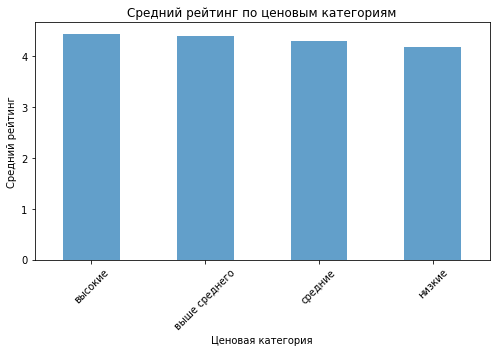

In [59]:
plt.figure(figsize=(7, 4))

price_rating = df.groupby('price')['rating'].mean().sort_values(ascending=False)

ax = price_rating.plot(kind='bar',
                       alpha=0.7,
                       figsize=(7, 5))

plt.title("Средний рейтинг по ценовым категориям")
plt.xlabel("Ценовая категория")
plt.ylabel("Средний рейтинг")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

Наибольшую положительную корреляцию рейтинги заведений показывают с ценовой категорией заведения.

---

### Задача 7

Сгруппируйте данные по названиям заведений и найдите топ-15 популярных сетей в Москве. Для них посчитайте значения среднего рейтинга. Под популярностью понимается количество заведений этой сети в регионе. К какой категории заведений они относятся? Результат сопроводите подходящими визуализациями.

Комментарирй студента: исправлен топ-15 и сводная таблица.

In [60]:
filtered_df2 = df.loc[df['chain'] == 1]
# Группируем данные по названиям заведений и вычисляем количество заведений
count_by_name = filtered_df2.groupby('name').size().reset_index(name='count')

# Добавляем столбцы со средним рейтингом и категорией
merged_data = count_by_name.merge(filtered_df2[['name', 'rating', 'category']].groupby('name').agg({'rating': 'mean', 'category': 'first'}).reset_index(), on='name')

# Сортируем данные по количеству заведений в порядке убывания
sorted_data = merged_data.sort_values(by='count', ascending=False)

# Выводим топ-15 заведений
top_15 = sorted_data.head(15)
print(top_15)


                                    name  count    rating         category
731                          ШОКОЛАДНИЦА    120  4.177500          кофейня
337                       ДОМИНО'С ПИЦЦА     76  4.169737         пиццерия
333                           ДОДО ПИЦЦА     74  4.286486         пиццерия
146                     ONE PRICE COFFEE     71  4.064789          кофейня
744                         ЯНДЕКС ЛАВКА     69  3.872464         ресторан
58                                 COFIX     65  4.075385          кофейня
168                                PRIME     50  4.116000         ресторан
666                           ХИНКАЛЬНАЯ     44  4.322727  быстрое питание
411                             КОФЕПОРТ     42  4.147619          кофейня
420  КУЛИНАРНАЯ ЛАВКА БРАТЬЕВ КАРАВАЕВЫХ     39  4.394872             кафе
630                              ТЕРЕМОК     38  4.123684         ресторан
685                              ЧАЙХАНА     37  3.924324             кафе
39                       

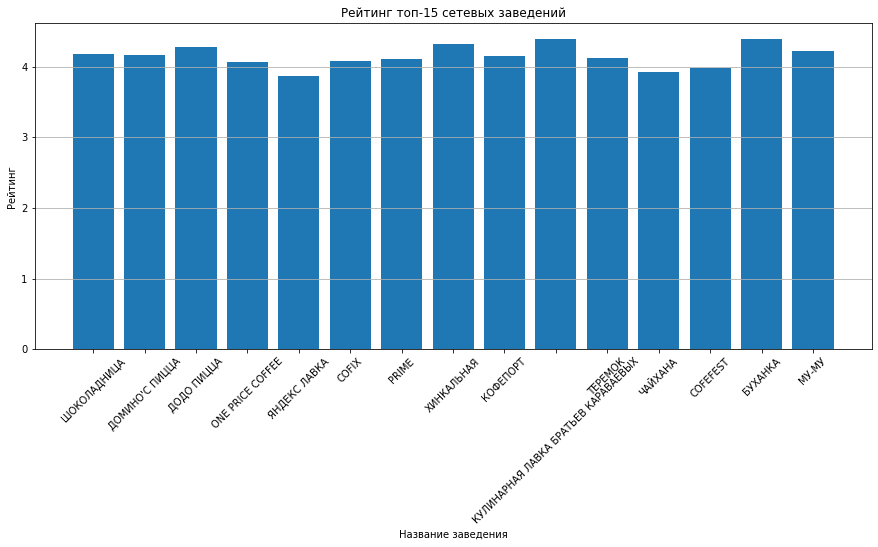

In [61]:
plt.figure(figsize=(15, 6))
plt.bar(top_15['name'], top_15['rating'])
plt.title('Рейтинг топ-15 сетевых заведений')
plt.xlabel('Название заведения')
plt.ylabel('Рейтинг')
plt.xticks(rotation=45)  # Поворачиваем названия заведений для лучшей читаемости
plt.grid(axis='y')
plt.show()

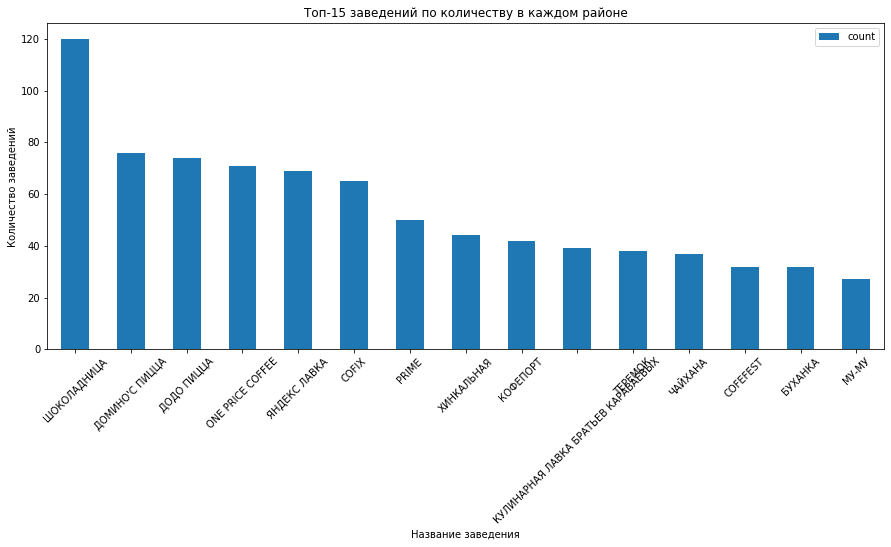

In [62]:
top_15.plot(kind='bar', x='name', y='count', figsize=(15, 6))
plt.title("Топ-15 заведений по количеству в каждом районе")
plt.xlabel("Название заведения")
plt.ylabel("Количество заведений")
plt.xticks(rotation=45)  # Поворот меток по оси X для лучшего чтения
plt.show()


На первом месте по популярности с довольно большим отрывом "Шоколадница". В принципе, топ-15 популярных сетей представлены в разнообразных категориях, среди которых можно выделить кофейни, пиццерии и рестораны.

---

### Задача 8

Изучите вариацию среднего чека заведения (столбец `middle_avg_bill`) в зависимости от района Москвы. Проанализируйте цены в Центральном административном округе и других. Как удалённость от центра влияет на цены в заведениях? Результат сопроводите подходящими визуализациями.


In [63]:
result = df.groupby('district')['middle_avg_bill'].agg(['mean', 'median'])

print(result)




                                                mean  median
district                                                    
Восточный административный округ          820.626923   575.0
Западный административный округ          1053.225490  1000.0
Северный административный округ           927.959627   650.0
Северо-Восточный административный округ   716.611296   500.0
Северо-Западный административный округ    822.222930   700.0
Центральный административный округ       1191.057547  1000.0
Юго-Восточный административный округ      654.097938   450.0
Юго-Западный административный округ       792.561702   600.0
Южный административный округ              834.398089   500.0


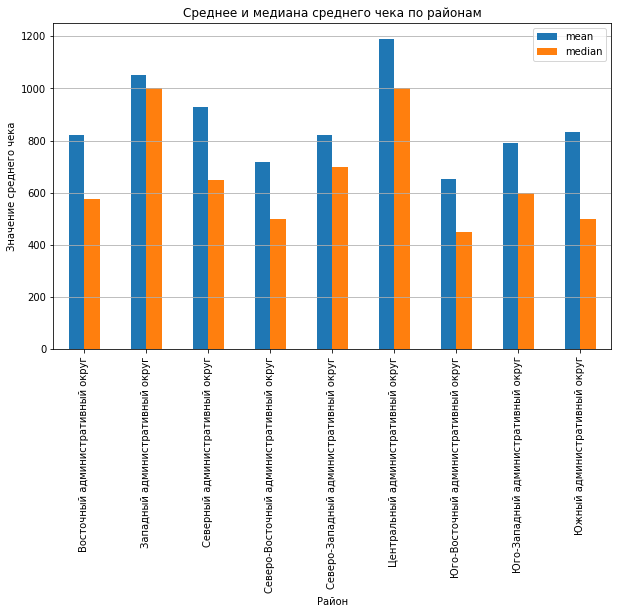

In [64]:
result.plot(kind='bar', figsize=(10, 6))
plt.title('Среднее и медиана среднего чека по районам')
plt.xlabel('Район')
plt.ylabel('Значение среднего чека')
plt.grid(axis='y')
plt.show()

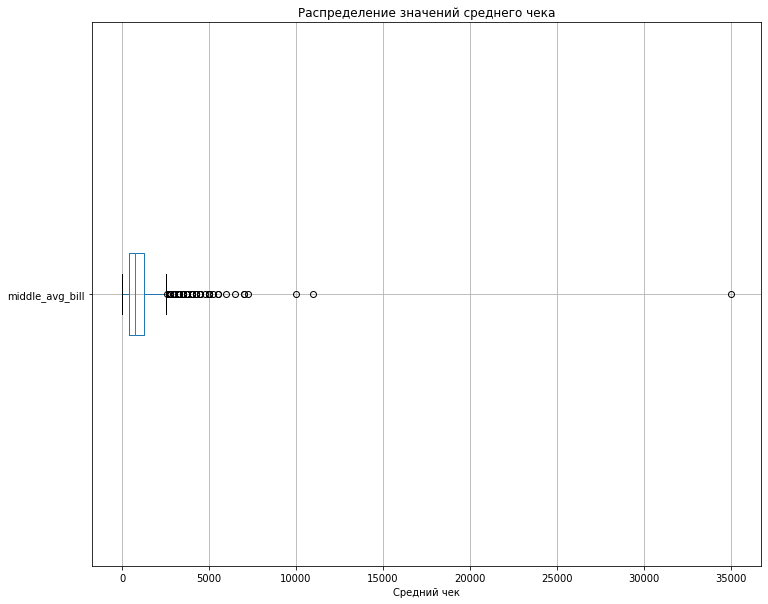

In [65]:
df.boxplot(column='middle_avg_bill', vert=False, grid=True, figsize=(12, 10))

#Добавляем название
plt.title('Распределение значений среднего чека')

# Подписываем оси
plt.xlabel('Средний чек')


plt.show()

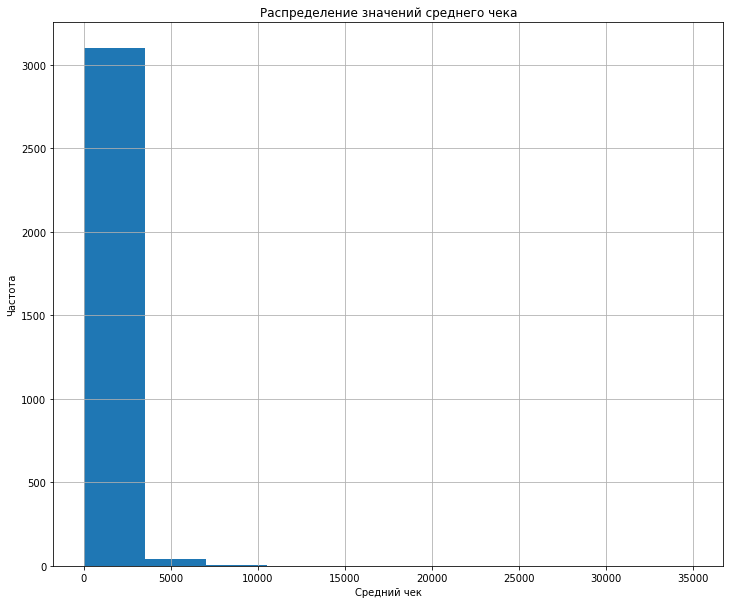

In [66]:
df['middle_avg_bill'].hist(figsize=(12, 10))
plt.title('Распределение значений среднего чека')
plt.xlabel('Средний чек')
plt.ylabel('Частота')
plt.grid(True)
plt.show()

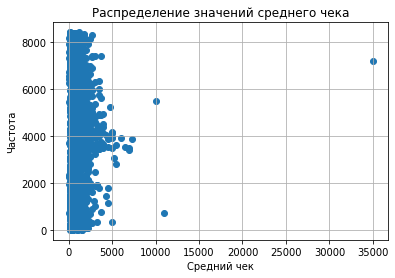

In [67]:
plt.scatter(df['middle_avg_bill'], df.index)
plt.title('Распределение значений среднего чека')
plt.xlabel('Средний чек')
plt.ylabel('Частота')
plt.grid(True)
plt.show()

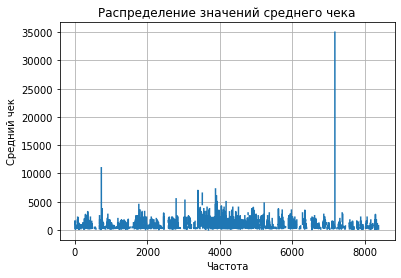

In [68]:
plt.plot(df.index, df['middle_avg_bill'])
plt.title('Распределение значений среднего чека')
plt.xlabel('Частота')
plt.ylabel('Средний чек')
plt.grid(True)
plt.show()

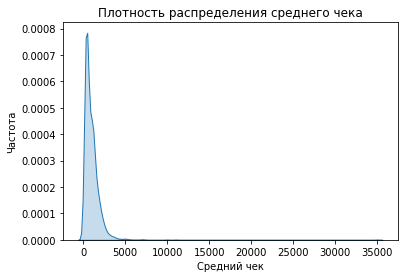

In [69]:
sns.kdeplot(df['middle_avg_bill'], fill=True)
plt.title('Плотность распределения среднего чека')
plt.xlabel('Средний чек')
plt.ylabel('Частота')
plt.show()


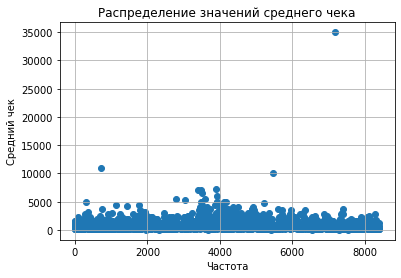

In [70]:
plt.scatter(df.index, df['middle_avg_bill'])
plt.title('Распределение значений среднего чека')
plt.xlabel('Частота')
plt.ylabel('Средний чек')
plt.grid(True)
plt.show()


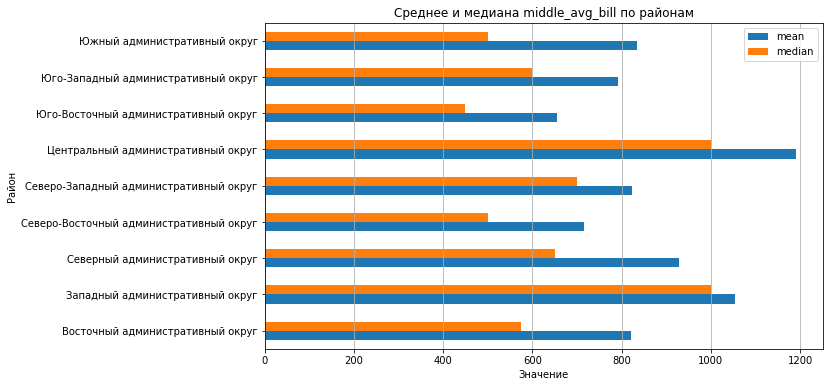

In [71]:
result.plot(kind='barh', figsize=(10, 6))
plt.title('Среднее и медиана middle_avg_bill по районам')
plt.xlabel('Значение')
plt.ylabel('Район')
plt.grid(axis='x')
plt.show()

Наиболее большие чеки фиксируются в центральном административном округе, на втором месте - западный административный округ. 
Далее распределение относительно равномерное, но можно заметить, что в южных округах средний чек в принципе ниже.

---


---

### Промежуточный вывод

Обобщите полученные результаты, выделив, по вашему мнению, самые важные.

Больше всего заведений представлено в категориях "кафе" (более 2000), "ресторан" (около 2000) и "кофейня" (чуть менее 1500).

Больше всего заведений расположено в центральном административном округе (более 2000), меньше всего - в сеферо-западном административном округе (менее 500). При этом больше всего в центральном административном округе именно ресторанов (более 600).

Несетевые заведения в соотношении незначительно преобладают над сетевыми заведениями (4781 против 3089).

Среди заведений с высоким рейтингом преобладают заведения с высокими ценами, данное значение идет на спад равномерно.

Самые большие средние чеки фиксируются в центральном и западном административных округах, самые низкие - в юго-восточном.

## 4. Итоговый вывод и рекомендации
Был проведен исследовательский анализ рынка заведений общественного питания Москвы. Были проанализированы такие факторы, как количество объектов общественного питания, распределение по административным районам, соотношение сетевых и несетевых заведений и другие факторы.

Помимо этого, были нивелированы пропуски и дубликаты, что позволило увеличить степень релевантности результатов анализа.

Больше всего заведений представлено в категориях "кафе" (более 2000), "ресторан" (около 2000) и "кофейня" (чуть менее 1500).

Больше всего заведений расположено в центральном административном округе (более 2000), меньше всего - в сеферо-западном административном округе (менее 500). При этом больше всего в центральном административном округе именно ресторанов (более 600).

Несетевые заведения в соотношении незначительно преобладают над сетевыми заведениями (4781 против 3089).

Среди заведений с высоким рейтингом преобладают заведения с высокими ценами, данное значение идет на спад равномерно.

Самые большие средние чеки фиксируются в центральном и западном административных округах, самые низкие - в юго-восточном.

Возможные направления дальнейшего развития и рекомендации:
Южные и восточные регионы, судя по всему, не предоставляют выгодной и конкуретно-способной площадки для общепита.
В центральном регионе, при том что он является самым распространенным местом для наиболее прибыльных сфер общепита (баров и ресторанов), скорее всего, наблюдается сильная конкуренция, что является неблагоприятной средой для начинающей сети и развивающегося бизнеса.
Если имеется такая возжность, лучше всего открывать бар или ресторан в западном административном округе - там наблюдаются траты на уровне с центральным административным округом, но при этом конкуренция должна быть в разы ниже.